See fail tegeleb semestri alguse ja lõpu küsitluste analüüsiga.

Kasutatud materjalid (bar charti label): https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/ 

In [38]:
pip install researchpy

Note: you may need to restart the kernel to use updated packages.


In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import researchpy as rp
import scipy.stats as stats


algus = pd.read_csv("semestri_alguse_küsitlus.csv", encoding='utf-8')

lopp = pd.read_csv("semestri_lõpu_küsitlus.csv", encoding='utf-8')

hinded = pd.read_csv("tudengid_moodlest_hinded.csv", encoding='utf-8')
hinded["Kasutaja täisnimi"] = hinded.apply(lambda row: row["Eesnimi"] + " " + row["Perenimi"], axis=1)
hinded['Kasutaja täisnimi'] = hinded['Kasutaja täisnimi'].str.strip()
hinded["Seminaride punktid kokku (Punktid)"] = hinded["Seminaride punktid kokku (Punktid)"].replace("-", 0)
hinded["Seminaride punktid kokku (Punktid)"] = pd.to_numeric(hinded["Seminaride punktid kokku (Punktid)"])

In [40]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

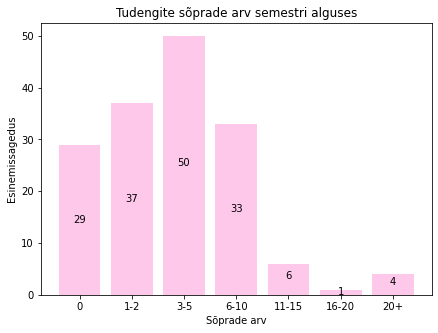

In [41]:
algus_soprade_arv_tabel = algus[["Mitu head sõpra või tuttavat sul kursuse peale on?"]]

algus_jaotumine = [["0", algus_soprade_arv_tabel.value_counts()["0"]],
       ["1-2", algus_soprade_arv_tabel.value_counts()["1-2"]],
       ["3-5", algus_soprade_arv_tabel.value_counts()["3-5"]],
       ["6-10", algus_soprade_arv_tabel.value_counts()["6-10"]],
       ["11-15", algus_soprade_arv_tabel.value_counts()["11-15"]],
       ["16-20", algus_soprade_arv_tabel.value_counts()["16-20"]],
       ["20+", algus_soprade_arv_tabel.value_counts()["20+"]]]

algus_jaotumine = pd.DataFrame(algus_jaotumine, columns = ["Sõbrad", "Esinemissagedus"])

algus_jaotumine['colors'] = '#FDC8EA'

f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)

plt.bar(algus_jaotumine.Sõbrad, algus_jaotumine.Esinemissagedus, color=algus_jaotumine.colors)

plt.title("Tudengite sõprade arv semestri alguses")
plt.ylabel("Esinemissagedus")
plt.xlabel("Sõprade arv")
addlabels(algus_jaotumine.Sõbrad, algus_jaotumine.Esinemissagedus)


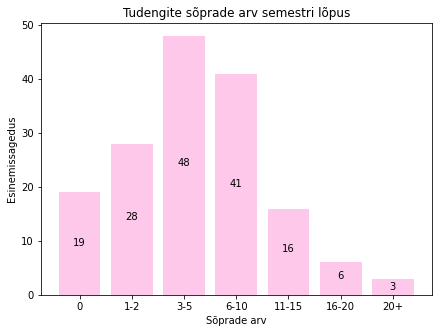

In [42]:
lopp_soprade_arv_tabel = lopp[["Mitu head sõpra või tuttavat sul kursuse peale on?"]]

lopp_jaotumine = [["0", lopp_soprade_arv_tabel.value_counts()["0"]],
       ["1-2", lopp_soprade_arv_tabel.value_counts()["1-2"]],
       ["3-5", lopp_soprade_arv_tabel.value_counts()["3-5"]],
       ["6-10", lopp_soprade_arv_tabel.value_counts()["6-10"]],
       ["11-15", lopp_soprade_arv_tabel.value_counts()["11-15"]],
       ["16-20", lopp_soprade_arv_tabel.value_counts()["16-20"]],
       ["20+", lopp_soprade_arv_tabel.value_counts()["20+"]]]

lopp_jaotumine = pd.DataFrame(lopp_jaotumine, columns = ["Sõbrad", "Esinemissagedus"])

lopp_jaotumine['colors'] = '#FDC8EA'

f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)

plt.bar(lopp_jaotumine.Sõbrad, lopp_jaotumine.Esinemissagedus, color=lopp_jaotumine.colors)

plt.title("Tudengite sõprade arv semestri lõpus")
plt.ylabel("Esinemissagedus")
plt.xlabel("Sõprade arv")
addlabels(lopp_jaotumine.Sõbrad, lopp_jaotumine.Esinemissagedus)


In [43]:
algus = algus[["Kasutaja täisnimi", "Mitu head sõpra või tuttavat sul kursuse peale on?"]]
algus.rename(columns = {'Mitu head sõpra või tuttavat sul kursuse peale on?':'Sõprade arv (algus)'}, inplace = True)

lopp = lopp[["Kasutaja täisnimi", "Sugu", "Mitu head sõpra või tuttavat sul kursuse peale on?"]]
lopp.rename(columns = {'Mitu head sõpra või tuttavat sul kursuse peale on?':'Sõprade arv (lopp)'}, inplace = True)

merge_tabel = pd.merge(algus, lopp, on=["Kasutaja täisnimi"])
merge_tabel = merge_tabel[["Kasutaja täisnimi","Sugu", 'Sõprade arv (algus)', 'Sõprade arv (lopp)']]

<AxesSubplot:>

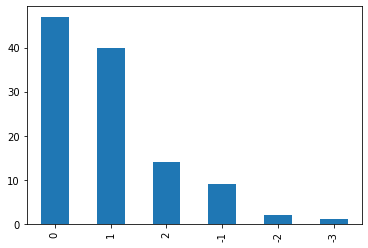

In [44]:
merge_tabel["Sõprade arvu numbriline väärtus (algus)"] = 0
merge_tabel["Sõprade arvu numbriline väärtus (lopp)"] = 0
merge_tabel["Sõprade arvu vahe"] = 0

merge_tabel = np.array(merge_tabel)

# x - selle tulba väärtust vaatame ehk nt alguse küsitluse sõprade arvu vahemikke
# y - sinna tulpa paneme vahemikule vastava numbrilise väärtuse kirja
def soprade_arvu_numbrilised_vaartused (x, y, data_tabel):
    for rida in range(len(data_tabel)):
        if data_tabel[rida][x] == "0":
            data_tabel[rida][y] = 0
        elif data_tabel[rida][x] == "1-2":
            data_tabel[rida][y] = 1
        elif data_tabel[rida][x] == "3-5":
            data_tabel[rida][y] = 2
        elif data_tabel[rida][x] == "6-10":
            data_tabel[rida][y] = 3
        elif data_tabel[rida][x] == "11-15":
            data_tabel[rida][y] = 4
        elif data_tabel[rida][x] == "16-20":
            data_tabel[rida][y] = 5
        elif data_tabel[rida][x] == "20+":
            data_tabel[rida][y] = 6

# Algus
soprade_arvu_numbrilised_vaartused(2,4, merge_tabel)
#Lõpp
soprade_arvu_numbrilised_vaartused(3,5, merge_tabel)

for rida in range(len(merge_tabel)):
    merge_tabel[rida][6] = merge_tabel[rida][5] - merge_tabel[rida][4]

    
#merge_tabel = pd.DataFrame(merge_tabel)
merge_tabel = pd.DataFrame(merge_tabel, columns = ["Kasutaja täisnimi", "Sugu","Sõprade arv (algus)", "Sõprade arv (lopp)", "Sõprade arvu number (algus)", "Sõprade arvu number (lopp)", "Muutuse vahe"])
merge_tabel["Muutuse vahe"].value_counts(sort=True, normalize=False).plot(kind='bar')


In [45]:
muutused = merge_tabel["Muutuse vahe"].value_counts(sort=True, normalize=False)
print(muutused)


 0    47
 1    40
 2    14
-1     9
-2     2
-3     1
Name: Muutuse vahe, dtype: int64


In [46]:
hinded_kasvamine = hinded[["Kasutaja täisnimi", 'Seminaride punktid kokku (Punktid)', "Lõpphinne (Punktid)"]]
hinded_sugudega = pd.merge(merge_tabel, hinded_kasvamine, on=["Kasutaja täisnimi"])

In [47]:
summary, results = rp.ttest(group1=hinded_sugudega["Seminaride punktid kokku (Punktid)"][hinded_sugudega["Muutuse vahe"] > 0], group1_name= "Sõprade arv suurenes",
                            group2=hinded_sugudega["Seminaride punktid kokku (Punktid)"][hinded_sugudega["Muutuse vahe"] <= 0], group2_name= "Sõprade arv sama või vähenes")
print(summary)
print(results)

                       Variable      N       Mean        SD        SE  \
0          Sõprade arv suurenes   54.0  14.046296  1.321063  0.179774   
1  Sõprade arv sama või vähenes   59.0  13.433220  1.601922  0.208552   
2                      combined  113.0  13.726195  1.499792  0.141089   

   95% Conf.   Interval  
0  13.685715  14.406877  
1  13.015757  13.850683  
2  13.446646  14.005744  
                                  Independent t-test   results
0  Difference (Sõprade arv suurenes - Sõprade arv...    0.6131
1                              Degrees of freedom =   111.0000
2                                               t =     2.2078
3                           Two side test p value =     0.0293
4                          Difference < 0 p value =     0.9853
5                          Difference > 0 p value =     0.0147
6                                       Cohen's d =     0.4158
7                                       Hedge's g =     0.4130
8                                  G

In [48]:
summary, results = rp.ttest(group1=hinded_sugudega["Lõpphinne (Punktid)"][hinded_sugudega["Muutuse vahe"] > 0], group1_name= "Sõprade arv suurenes",
                            group2=hinded_sugudega["Lõpphinne (Punktid)"][hinded_sugudega["Muutuse vahe"] <= 0], group2_name= "Sõprade arv sama või vähenes")
print(summary)
print(results)

                       Variable      N       Mean        SD        SE  \
0          Sõprade arv suurenes   54.0  86.342593  9.763120  1.328592   
1  Sõprade arv sama või vähenes   59.0  83.217119  9.507437  1.237763   
2                      combined  113.0  84.710708  9.714681  0.913880   

   95% Conf.   Interval  
0  83.677774  89.007411  
1  80.739467  85.694770  
2  82.899971  86.521445  
                                  Independent t-test   results
0  Difference (Sõprade arv suurenes - Sõprade arv...    3.1255
1                              Degrees of freedom =   111.0000
2                                               t =     1.7233
3                           Two side test p value =     0.0876
4                          Difference < 0 p value =     0.9562
5                          Difference > 0 p value =     0.0438
6                                       Cohen's d =     0.3245
7                                       Hedge's g =     0.3223
8                                  G

----------------

## Kuidas sõprade arv muutub mehi ja naisi võrreldes.

<AxesSubplot:>

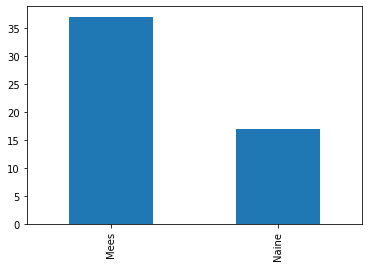

In [49]:
suurenemine = merge_tabel[merge_tabel["Muutuse vahe"] > 0]

suurenemine = pd.DataFrame(suurenemine)
suurenemine["Sugu"].value_counts(sort=True, normalize=False).plot(kind='bar')


<AxesSubplot:>

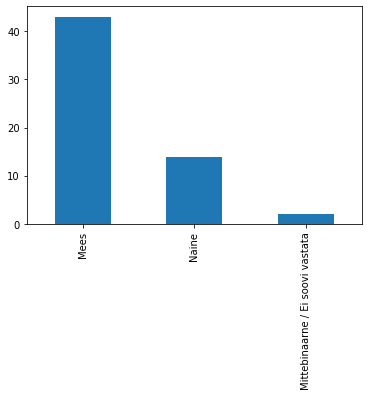

In [50]:
vahenemine_sama = merge_tabel[merge_tabel["Muutuse vahe"] <= 0]
vahenemine_sama = pd.DataFrame(vahenemine_sama)
vahenemine_sama["Sugu"].value_counts(sort=True, normalize=False).plot(kind='bar')

<AxesSubplot:>

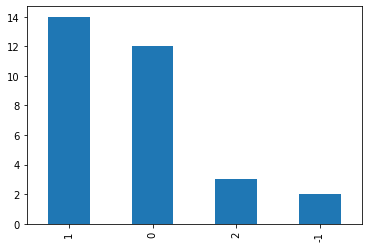

In [51]:
naised = merge_tabel[merge_tabel["Sugu"] == "Naine"]
naised["Muutuse vahe"].value_counts(sort=True, normalize=False).plot(kind='bar')

<AxesSubplot:>

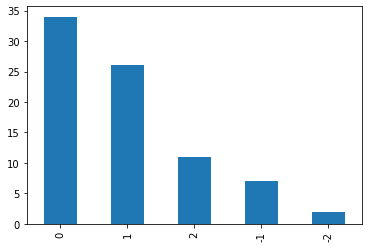

In [52]:
mehed = merge_tabel[merge_tabel["Sugu"] == "Mees"]
mehed["Muutuse vahe"].value_counts(sort=True, normalize=False).plot(kind='bar')

In [53]:
summary, results = rp.ttest(group1= merge_tabel["Muutuse vahe"][merge_tabel["Sugu"] == "Mees"], group1_name= "Mees",
                            group2= merge_tabel["Muutuse vahe"][merge_tabel["Sugu"] == "Naine"], group2_name= "Naine")
print(summary)
print(results)

# Vastus
# Mees   80 tudengit 0.462500  
# Naine   31 tudengit 0.580645 
# p = 0.5295

   Variable      N      Mean        SD        SE  95% Conf.  Interval
0      Mees   80.0  0.462500  0.927003  0.103642   0.256205  0.668795
1     Naine   31.0  0.580645  0.764818  0.137365   0.300108  0.861183
2  combined  111.0  0.495495  0.882907  0.083802   0.329420  0.661571
             Independent t-test   results
0  Difference (Mees - Naine) =    -0.1181
1         Degrees of freedom =   109.0000
2                          t =    -0.6308
3      Two side test p value =     0.5295
4     Difference < 0 p value =     0.2648
5     Difference > 0 p value =     0.7352
6                  Cohen's d =    -0.1334
7                  Hedge's g =    -0.1325
8             Glass's delta1 =    -0.1274
9           Point-Biserial r =    -0.0603


In [54]:
lopp = pd.DataFrame(lopp)
lopp["Sõprade arv lõpus (number)"] = 0
lopp = np.array(lopp)
soprade_arvu_numbrilised_vaartused(2,3, lopp)
lopp = pd.DataFrame(lopp, columns = ["Kasutaja täisnimi", "Sugu", "Sõprade arv (lopp)", "Sõprade arv lõpus (number)"])

hinded = hinded[["Kasutaja täisnimi",  'Seminaride punktid kokku (Punktid)', "Lõpphinne (Punktid)"]]
hinded_sugudega = pd.merge(lopp, hinded, on=["Kasutaja täisnimi"])

In [55]:
summary, results = rp.ttest(group1= hinded_sugudega["Lõpphinne (Punktid)"][hinded_sugudega["Sugu"] == "Mees"], group1_name= "Mehed",
                            group2= hinded_sugudega["Lõpphinne (Punktid)"][hinded_sugudega["Sugu"] == "Naine"], group2_name= "Naised")
print(summary)
print(results)

# Mehed  116 tudengit 83.499397  
# Naised   43 tudengit 85.673023   
# p = 0.2864

   Variable      N       Mean         SD        SE  95% Conf.   Interval
0     Mehed  116.0  83.499397  12.116128  1.124954  81.271079  85.727714
1    Naised   43.0  85.673023   9.070849  1.383292  82.881428  88.464619
2  combined  159.0  84.087233  11.386771  0.903030  82.303666  85.870800
               Independent t-test   results
0  Difference (Mehed - Naised) =    -2.1736
1           Degrees of freedom =   157.0000
2                            t =    -1.0697
3        Two side test p value =     0.2864
4       Difference < 0 p value =     0.1432
5       Difference > 0 p value =     0.8568
6                    Cohen's d =    -0.1910
7                    Hedge's g =    -0.1901
8               Glass's delta1 =    -0.1794
9             Point-Biserial r =    -0.0851


In [56]:
summary, results = rp.ttest(group1= hinded_sugudega["Lõpphinne (Punktid)"][hinded_sugudega["Sugu"] == "Mees"], group1_name= "Mehed",
                            group2= hinded_sugudega["Lõpphinne (Punktid)"][hinded_sugudega["Sugu"] == "Naine"], group2_name= "Naised")
print(summary)
print(results)

   Variable      N       Mean         SD        SE  95% Conf.   Interval
0     Mehed  116.0  83.499397  12.116128  1.124954  81.271079  85.727714
1    Naised   43.0  85.673023   9.070849  1.383292  82.881428  88.464619
2  combined  159.0  84.087233  11.386771  0.903030  82.303666  85.870800
               Independent t-test   results
0  Difference (Mehed - Naised) =    -2.1736
1           Degrees of freedom =   157.0000
2                            t =    -1.0697
3        Two side test p value =     0.2864
4       Difference < 0 p value =     0.1432
5       Difference > 0 p value =     0.8568
6                    Cohen's d =    -0.1910
7                    Hedge's g =    -0.1901
8               Glass's delta1 =    -0.1794
9             Point-Biserial r =    -0.0851


Text(0.5, 0, 'Sõprade arv')

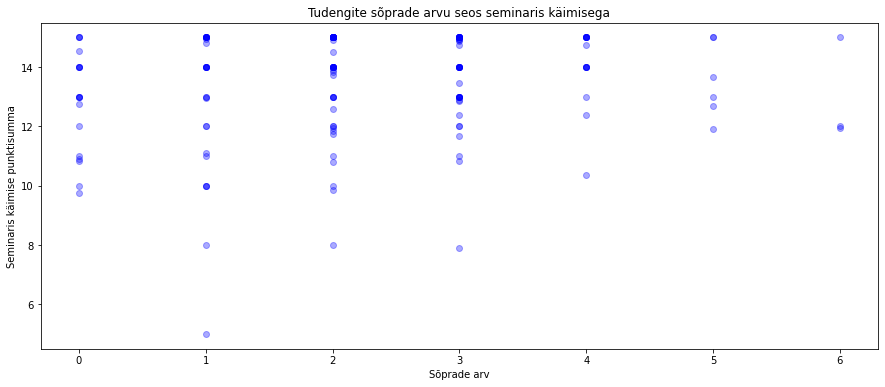

In [57]:
sobrad_seminaris = hinded_sugudega[["Sõprade arv lõpus (number)", "Seminaride punktid kokku (Punktid)"]]
sobrad_seminaris = pd.DataFrame(sobrad_seminaris)
sobrad_seminaris["Seminaride punktid kokku (Punktid)"] = sobrad_seminaris["Seminaride punktid kokku (Punktid)"].replace("-", 0)
sobrad_seminaris["Seminaride punktid kokku (Punktid)"] = pd.to_numeric(sobrad_seminaris["Seminaride punktid kokku (Punktid)"])
sobrad_seminaris.sort_values(by="Seminaride punktid kokku (Punktid)")

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)

plt.plot(sobrad_seminaris["Sõprade arv lõpus (number)"], sobrad_seminaris["Seminaride punktid kokku (Punktid)"], 'o', color='blue', alpha = 1/3);

plt.title("Tudengite sõprade arvu seos seminaris käimisega")
plt.ylabel("Seminaris käimise punktisumma")
plt.xlabel("Sõprade arv")


In [58]:
stats.pearsonr(sobrad_seminaris["Sõprade arv lõpus (number)"], 
               sobrad_seminaris["Seminaride punktid kokku (Punktid)"])

(0.15525276470216642, 0.04923766179814547)